In [55]:
import pandas as pd 
FILE_PATH = "C:\\Documents\\MLDP_PROJECT\\adult.csv"
df = pd.read_csv(FILE_PATH)
df

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
32556,22,Private,310152,Some-college,10,Never-married,Protective-serv,Not-in-family,White,Male,0,0,40,United-States,<=50K
32557,27,Private,257302,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
32558,40,Private,154374,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
32559,58,Private,151910,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K


In [56]:
# Check for missing values and data types
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32561 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32561 non-null  int64 
 1   workclass       32561 non-null  object
 2   fnlwgt          32561 non-null  int64 
 3   education       32561 non-null  object
 4   education.num   32561 non-null  int64 
 5   marital.status  32561 non-null  object
 6   occupation      32561 non-null  object
 7   relationship    32561 non-null  object
 8   race            32561 non-null  object
 9   sex             32561 non-null  object
 10  capital.gain    32561 non-null  int64 
 11  capital.loss    32561 non-null  int64 
 12  hours.per.week  32561 non-null  int64 
 13  native.country  32561 non-null  object
 14  income          32561 non-null  object
dtypes: int64(6), object(9)
memory usage: 3.7+ MB
None


<Axes: xlabel='income', ylabel='count'>

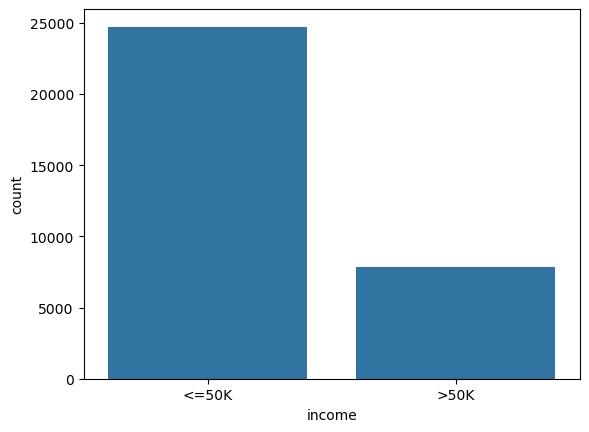

In [57]:
import seaborn as sns
sns.countplot(x='income', data=df)

In [58]:
# Check for exact duplicates (Real data has some, but synthetic data often has more or none)
print(f"Duplicate rows: {df.duplicated().sum()}")

Duplicate rows: 24


In [59]:
# Check the "long tail" of native countries
print(df['native.country'].value_counts())

native.country
United-States                 29170
Mexico                          643
?                               583
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        64
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece       

In [60]:
import numpy as np

# Replace '?' with NaN so pandas recognizes them as missing
df.replace('?', np.nan, inplace=True)

# Check which columns have missing values
print(df.isnull().sum())

age                  0
workclass         1836
fnlwgt               0
education            0
education.num        0
marital.status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital.gain         0
capital.loss         0
hours.per.week       0
native.country     583
income               0
dtype: int64


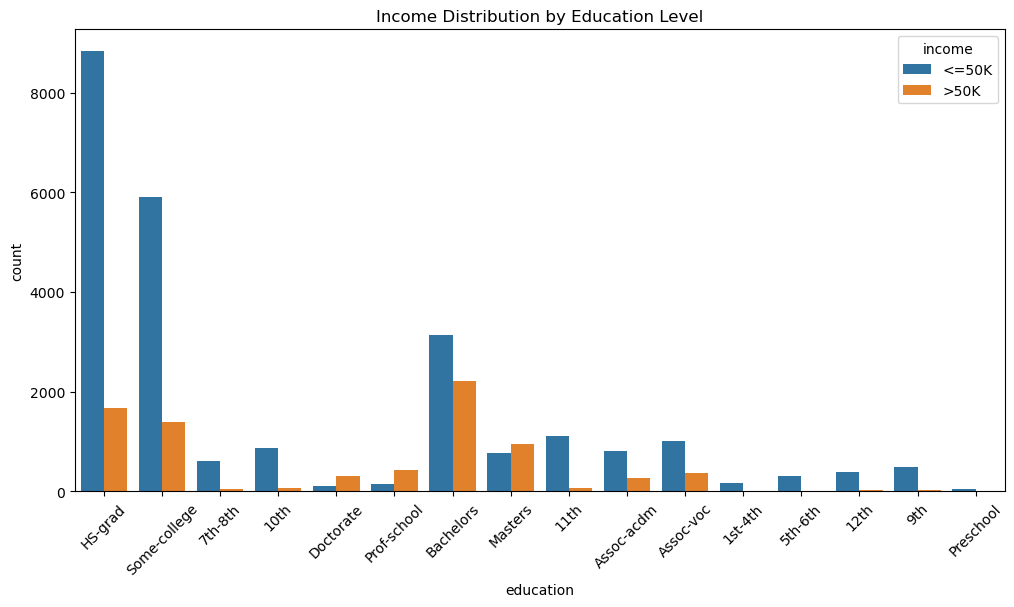

In [61]:
import seaborn as sns
import matplotlib.pyplot as plt

# See how Education affects Income
plt.figure(figsize=(12,6))
sns.countplot(data=df, x='education', hue='income')
plt.xticks(rotation=45)
plt.title("Income Distribution by Education Level")
plt.show()

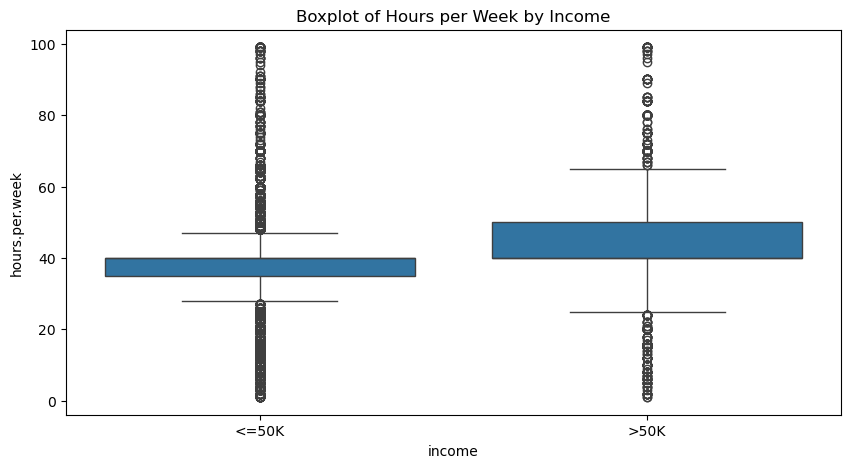

In [62]:
# 3. Boxplot: Hours per week by Income (To visualize outliers)
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income', y='hours.per.week')
plt.title("Boxplot of Hours per Week by Income")
plt.show()

In [63]:
# --- Handling Outliers (Replacing values)---
# Justification: Extreme values in capital gain and hours worked can pull the 
# Logistic Regression decision boundary significantly, leading to poor generalization.
# We cap at the 99th percentile to retain the 'signal' of high earners while 
# removing the 'noise' of extreme outliers.

num_cols = ['age', 'hours.per.week', 'capital.gain', 'capital.loss']
for col in num_cols:
    upper_limit = df[col].quantile(0.99)
    lower_limit = df[col].quantile(0.01)
    # Cap upper and floor lower
    df[col] = np.where(df[col] > upper_limit, upper_limit, df[col])
    df[col] = np.where(df[col] < lower_limit, lower_limit, df[col])

print("Outliers capped at 1st and 99th percentiles for model stability.")

Outliers capped at 1st and 99th percentiles for model stability.


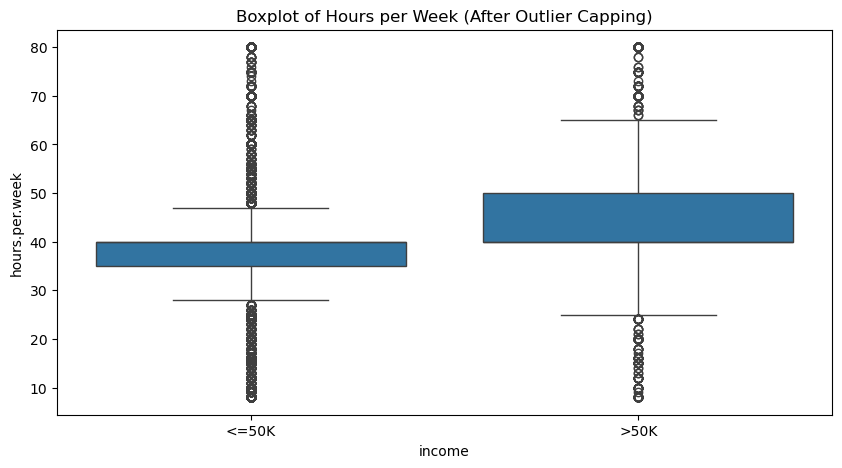

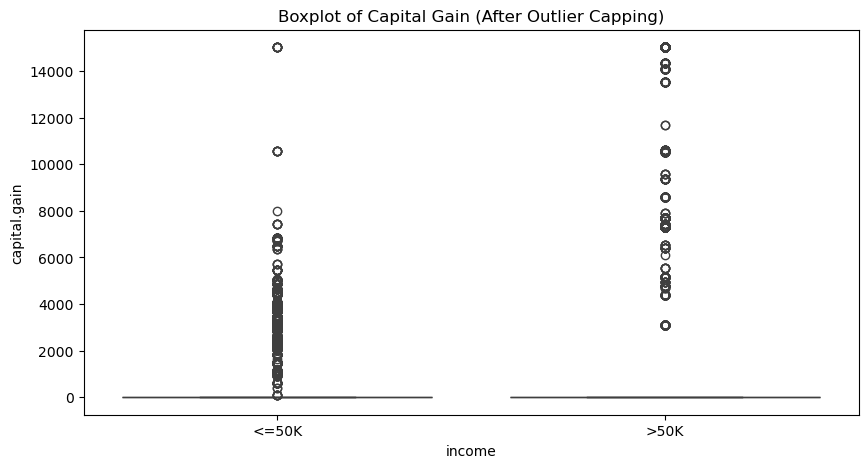

In [64]:
# --- Visualizing the results of Outlier Handling ---
# We use a boxplot again to verify that the extreme values have been 
# brought within a reasonable range (the "whiskers").

plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income', y='hours.per.week')
plt.title("Boxplot of Hours per Week (After Outlier Capping)")
plt.show()

# Optional: Visualize Capital Gain as well, as it had the most extreme outliers
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x='income', y='capital.gain')
plt.title("Boxplot of Capital Gain (After Outlier Capping)")
plt.show()

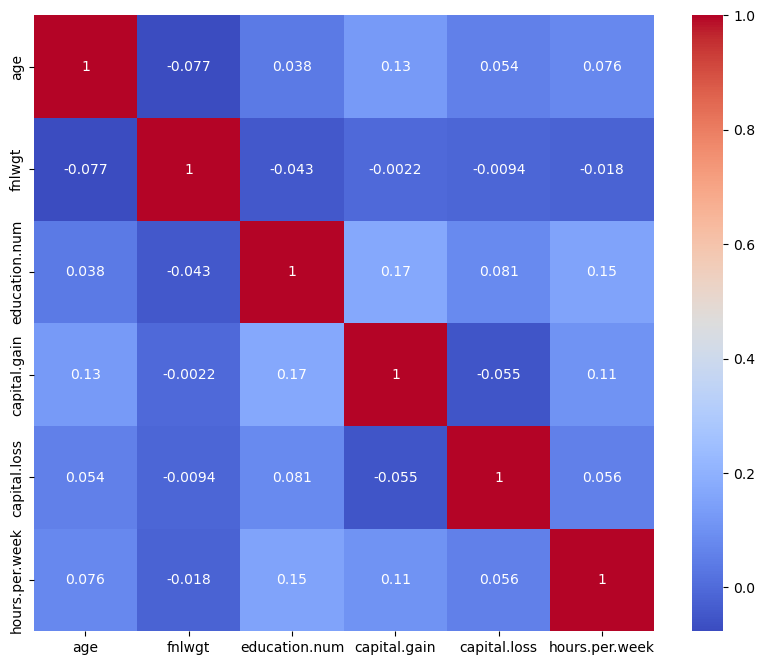

In [65]:
# Simplify native country as a first step
df['native.country'] = df['native.country'].apply(lambda x: 'United-States' if x == 'United-States' else 'Other')

# Drop redundancy: education and education.num represent the same thing
df.drop('education', axis=1, inplace=True)

# Visualize correlations
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 8))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
plt.show()

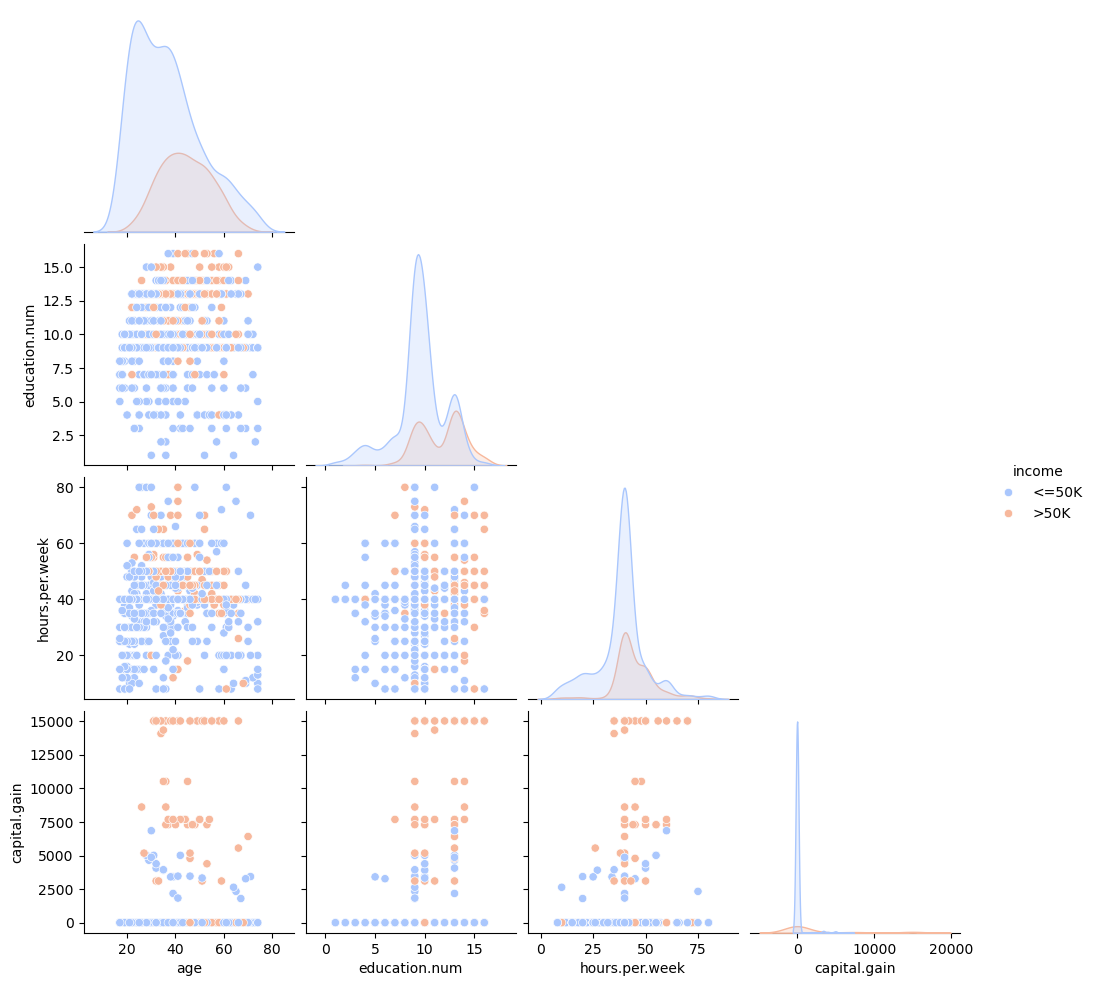

In [66]:
# Select key numerical columns and sample 1000 rows for speed/clarity
cols_to_plot = ['age', 'education.num', 'hours.per.week', 'capital.gain', 'income']
sns.pairplot(df[cols_to_plot].sample(1000), hue='income', palette='coolwarm', corner=True)
plt.show()

In [67]:
df['income'] = df['income'].map({'<=50K': 0, '>50K': 1})

In [68]:
df_final = pd.get_dummies(df, drop_first=True)

In [69]:
from sklearn.model_selection import train_test_split

X = df_final.drop('income', axis=1)
y = df_final['income']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [70]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV

param_dist = {
    'n_estimators': [100, 200, 500],
    'max_depth': [10, 20, 30],
    'min_samples_leaf': [1, 2, 4]
}

random_search = RandomizedSearchCV(
    estimator=RandomForestClassifier(random_state=42),
    param_distributions=param_dist,
    n_iter=10, 
    cv=3, 
    scoring='f1',
    random_state=42,
    n_jobs=-1
)

random_search.fit(X_train, y_train)
best_rf = random_search.best_estimator_
final_preds = best_rf.predict(X_test)

In [71]:
from sklearn.metrics import f1_score, classification_report, confusion_matrix

# --- EVALUATION & FEATURE INTERPRETATION ---
print(f"Best Parameters: {random_search.best_params_}")
print(f"Final Tuned Model F1-Score: {f1_score(y_test, final_preds):.4f}")
print("\n--- Final Tuned Model Report ---")
print(classification_report(y_test, final_preds))

Best Parameters: {'n_estimators': 100, 'min_samples_leaf': 2, 'max_depth': 30}
Final Tuned Model F1-Score: 0.6733

--- Final Tuned Model Report ---
              precision    recall  f1-score   support

           0       0.88      0.94      0.91      4976
           1       0.77      0.60      0.67      1537

    accuracy                           0.86      6513
   macro avg       0.83      0.77      0.79      6513
weighted avg       0.86      0.86      0.86      6513



In [72]:
# --- CHECKING FOR OVERFITTING / UNDERFITTING ---
# Rationale: We compare Training vs Test F1-scores to ensure the model 
# generalizes well and isn't just memorizing the training data.

# 1. Calculate scores for both sets
train_f1 = f1_score(y_train, best_rf.predict(X_train))
test_f1 = f1_score(y_test, final_preds)

print(f"Training F1-Score: {train_f1:.4f}")
print(f"Test F1-Score: {test_f1:.4f}")
print(f"Difference: {abs(train_f1 - test_f1):.4f}")

# 2. Automated Interpretation Logic
if train_f1 > test_f1 + 0.15:
    model_fit_result = "Potential Overfitting (High Variance)"
elif train_f1 < 0.50 and test_f1 < 0.50:
    model_fit_result = "Potential Underfitting (High Bias)"
else:
    model_fit_result = "Good Fit (Balanced Model)"

print(f"Result: {model_fit_result}")

Training F1-Score: 0.8122
Test F1-Score: 0.6733
Difference: 0.1389
Result: Good Fit (Balanced Model)


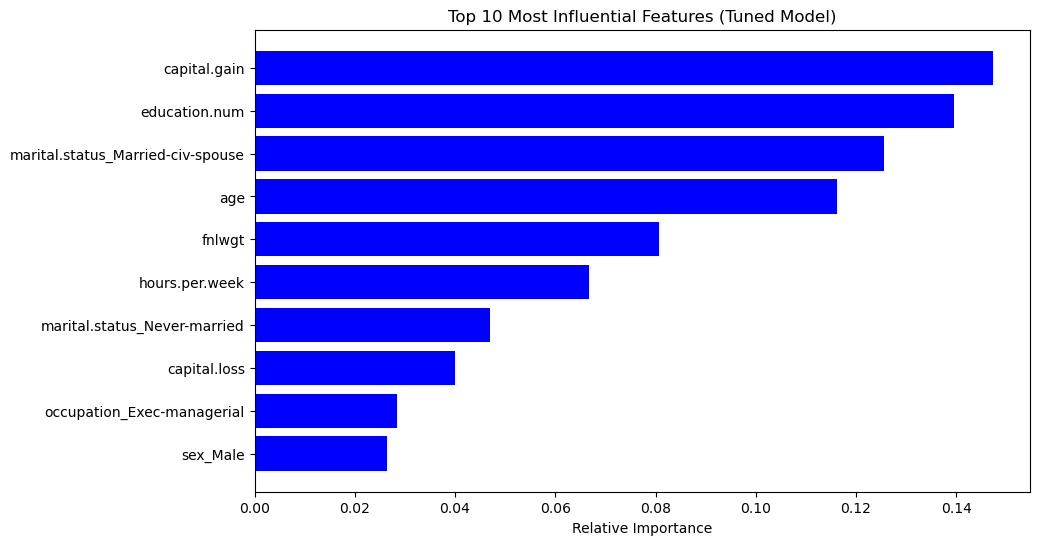

In [73]:
# 1. Top 10 Influential Features (Individual Dummies)
importances = best_rf.feature_importances_
indices = np.argsort(importances)[-10:]

plt.figure(figsize=(10, 6))
plt.title('Top 10 Most Influential Features (Tuned Model)')
plt.barh(range(len(indices)), importances[indices], color='b', align='center')
plt.yticks(range(len(indices)), [X.columns[i] for i in indices])
plt.xlabel('Relative Importance')
plt.show()

In [74]:
# 2. Grouped Cumulative Importance Analysis
df_dt_feat_impt = pd.DataFrame ({"Feature": best_rf.feature_names_in_, "Importance": best_rf.feature_importances_})
df_dt_feat_impt['Feature'] = df_dt_feat_impt["Feature"].str.rsplit("_", n=1).str[0]
df_dt_feat_impt = df_dt_feat_impt.groupby("Feature")["Importance"].sum().sort_values(ascending=False).reset_index()
df_dt_feat_impt["Cumulative Importance"] = df_dt_feat_impt["Importance"].cumsum()

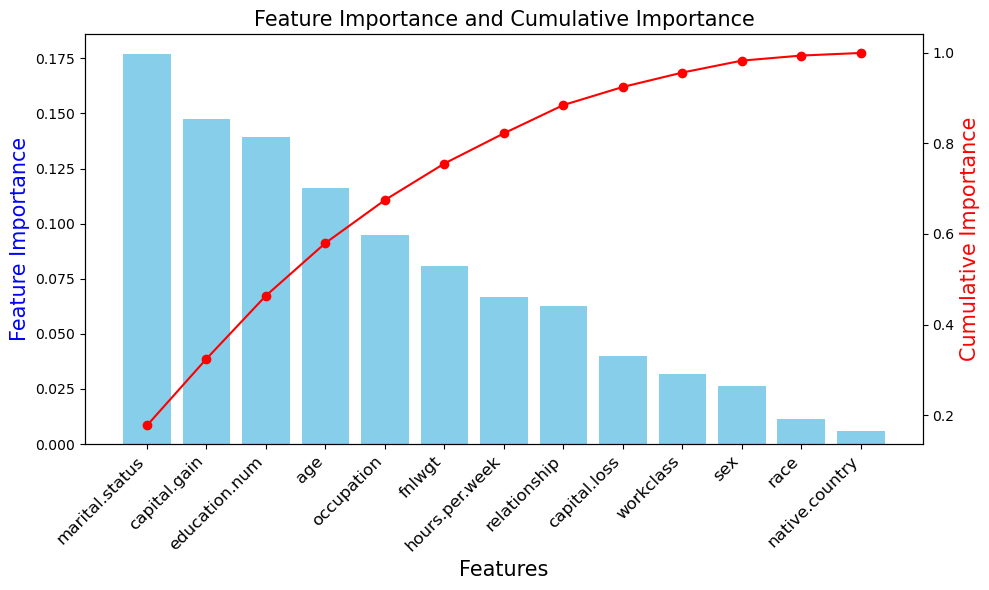

In [75]:
fig, ax1 = plt.subplots(figsize=(10, 6))
ax1.bar(df_dt_feat_impt['Feature'], df_dt_feat_impt['Importance'], color='skyblue')
ax1.set_xlabel('Features', size=15)
ax1.set_ylabel('Feature Importance', color='blue', size=15)
ax1.set_xticks(range(len(df_dt_feat_impt['Feature'])))
ax1.set_xticklabels(df_dt_feat_impt['Feature'], rotation=45, ha='right', size=12)

ax2 = ax1.twinx()
ax2.plot(df_dt_feat_impt['Feature'], df_dt_feat_impt['Cumulative Importance'], color='red', marker='o')
ax2.set_ylabel('Cumulative Importance', color='red', size=15)

plt.title('Feature Importance and Cumulative Importance', size=15)
plt.tight_layout()
plt.show()

In [76]:
# --- STEP: Feature Selection for Model Optimization ---
# Based on the Cumulative Importance graph, we select features that 
# contribute to the top ~95% of the model's predictive power.

# 1. Define the features to keep (Top performers from your graph)
top_features = ['marital.status', 'capital.gain', 'education.num', 'age', 
                'occupation', 'fnlwgt', 'hours.per.week', 'relationship']

# 2. Filter the X_train and X_test to only include these categories
# Note: Since we used get_dummies, we need to match the dummy column names
selected_columns = [col for col in X_train.columns if any(feat in col for feat in top_features)]

X_train_reduced = X_train[selected_columns]
X_test_reduced = X_test[selected_columns]

# 3. Re-train the best model on the reduced feature set
best_rf_reduced = RandomForestClassifier(**random_search.best_params_, random_state=42)
best_rf_reduced.fit(X_train_reduced, y_train)

final_f1 = f1_score(y_test, final_preds)
# 4. Compare performance
reduced_f1 = f1_score(y_test, best_rf_reduced.predict(X_test_reduced))
print(f"Original F1: {final_f1:.4f}")
print(f"Optimized (Reduced) F1: {reduced_f1:.4f}")

Original F1: 0.6733
Optimized (Reduced) F1: 0.6572


Final Model Comparison Table:
     Metric  Baseline (Logistic Regression)  Advanced (Tuned Random Forest)
0  Accuracy                          0.7982                        0.863043
1  F1-Score                          0.3784                        0.673260


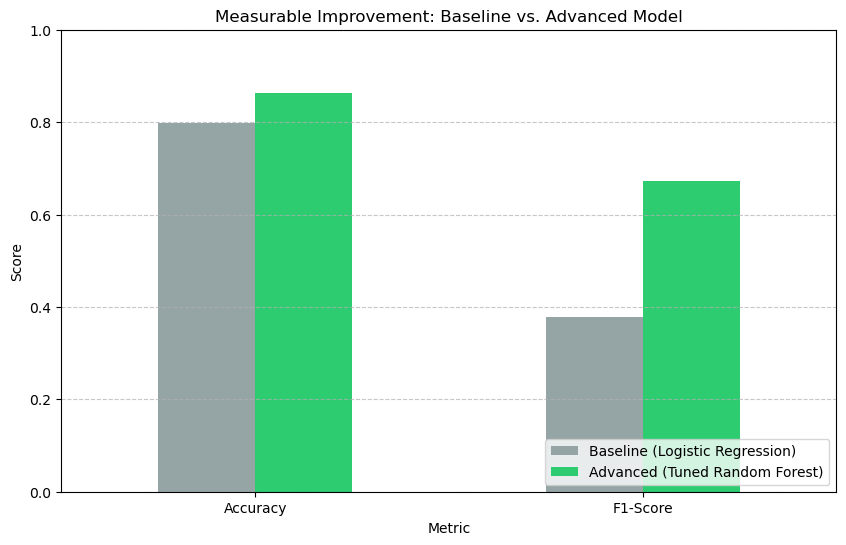

In [79]:
# --- FINAL PERFORMANCE COMPARISON ---
# Rationale: Demonstrating measurable improvement from the baseline (Logistic Regression) 
# to the final optimized Random Forest model. 
from sklearn.metrics import accuracy_score, f1_score, classification_report

# Note: These baseline values are from my base_model.ipynb results
baseline_f1 = 0.3784 
baseline_acc = 0.7982

# Current results
final_acc = accuracy_score(y_test, final_preds)

comparison_data = {
    'Metric': ['Accuracy', 'F1-Score'],
    'Baseline (Logistic Regression)': [baseline_acc, baseline_f1],
    'Advanced (Tuned Random Forest)': [final_acc, final_f1]
}

df_compare = pd.DataFrame(comparison_data)
print("Final Model Comparison Table:")
print(df_compare)

# Visualizing the improvement
df_compare.set_index('Metric').plot(kind='bar', figsize=(10, 6), color=['#95a5a6', '#2ecc71'])
plt.title('Measurable Improvement: Baseline vs. Advanced Model')
plt.ylabel('Score')
plt.xticks(rotation=0)
plt.ylim(0, 1.0)
plt.legend(loc='lower right')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

In [77]:
# --- SAVING THE MODEL ---
import joblib
joblib.dump(best_rf, 'income_prediction_model.pkl')
joblib.dump(list(X.columns), 'model_columns.pkl')
print("Model saved and ready for deployment!")

Model saved and ready for deployment!
